# Comparando os Resultados da Classificação

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm
import joblib

from pretty_confusion_matrix import pp_matrix

import warnings
warnings.filterwarnings('ignore')

## Dados Reais - Classificados via Automação

In [2]:
# Datasets

dados_output = pd.read_csv("datasets/outputSummaryOutputDataNOVOS.csv")
dados_output.head()

,Dataset,SubDominio(Esperado),SensorCategories,IoTSubdomain,Inference Type,Anonymization Algorithm
0,1,SecurityPublic,40,SecurityPublic,Percentage,k-anonimato
1,2,SecurityPublic,18,SecurityPublic,Percentage,k-anonimato
2,3,SecurityPublic,43,SecurityPublic,Percentage,k-anonimato
3,4,SecurityPublic,15,SecurityPublic,Percentage,k-anonimato
4,5,SecurityPublic,33,SecurityPublic,Percentage,k-anonimato


In [3]:
pd.crosstab(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"], rownames=["Real"], colnames=["Automação"], margins=True)

Automação,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartGrid,SmartHome,Undefined,UrbanMobility,All
Real,,,,,,,,,,,
Agriculture,6,0,0,0,0,0,0,0,0,0,6
HealthCare,0,6,0,0,0,0,0,0,0,0,6
IndependentLiving,0,5,1,0,0,0,0,0,0,0,6
IndustrialProcesses,0,0,0,6,0,0,0,0,0,0,6
Logistic,0,0,0,0,6,0,0,0,0,0,6
SecurityPublic,0,0,0,0,0,6,0,0,0,0,6
SmartCampus,0,0,0,0,0,4,2,0,0,0,6
SmartGrid,0,0,0,0,0,0,6,0,0,0,6
SmartHome,0,0,0,0,0,2,0,4,0,0,6


In [4]:
print(metrics.classification_report(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"]))

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         6
         HealthCare       0.55      1.00      0.71         6
  IndependentLiving       1.00      0.17      0.29         6
IndustrialProcesses       1.00      1.00      1.00         6
           Logistic       1.00      1.00      1.00         6
     SecurityPublic       0.43      1.00      0.60         6
        SmartCampus       0.00      0.00      0.00         6
          SmartGrid       0.75      1.00      0.86         6
          SmartHome       1.00      0.67      0.80         6
          Undefined       1.00      1.00      1.00         1
      UrbanMobility       1.00      0.67      0.80         6

           accuracy                           0.75        61
          macro avg       0.79      0.77      0.73        61
       weighted avg       0.78      0.75      0.71        61



### Entendendo as métricas da matriz de confusão

Para entendermos melhor os resultados da matriz de confusão, vamos estudar os termos de Verdadeiro Positivo, Verdadeiro Negativo, Falso Positivo e Falso Negativo. Considere a **Matriz de Confusão** teórica dada abaixo:

Estimado/Observado | $y=1$                         | $y=0$
-------------------|-------------------------------|-----------------------------
$\hat{y}=1$        | Verdadeiro Positivo           |Falso Positivo (Erro Tipo I)
$\hat{y}=0$        | Falso Negativo (Erro Tipo II) |Verdadeiro Negativo

**Prevalência**

O quanto do efito positivo (*1*) está presente na população.

$$Prevalência = \frac{\sum_{i=1}^{N}Condição\;Positiva}{N}$$

**Acurácia**

A métrica mais utilizada em problemas de classificação, refere-se a quanto o modelo acerta em relação ao total de predições. Utilizada para visualizar de forma geral o desempenho do classifcador. Fornece o percentual de classificações corretas pelo classificador. OBS: Apresenta problemas quanto a classes desbalanceadas.

$$Acc = \frac{Verdadeiros\; Positivos + Verdadeiros\; Negativos}{N}$$

**Error**

Este é complemento da acurácia, dado por:

$$Error = \frac{Predições\; Incorretas}{N}$$

**Verdadeiro Predito Positivo (VPP) ou Precisão**

É a taxa de Verdadeiro Positivo com relação ao total de predições positivas, ou seja, é a capacidade do modelo prever um evento como positivo (*1*), dado que, ele realmente é positivo (*1*). Em outras palavras, podemos dizer que esta métrica fornece o número de vezes que uma determinada classe foi predita corretamente dividido pelo n úmero de vezes que a classe foi predita.

$$VPP = \frac{Verdadeiro\; Positivo}{Verdadeiro \; Positivo + Falso \; Positivo}$$

**Verdadeiro Predito Negativo (VPN)**

É a taxa de Verdadeiro Negativo com relação ao total de predições negativas, ou seja, é a capacidade do modelo prever um evento como negativo (*0*), dado que, ele realmente é negativo (*0*).

$$VPN = \frac{Verdadeiro\;Negativo}{Verdadeiro\;Negativo+Falso\;Negativo}$$

**Sensibilidade ou Recall**

A sensibilidade se refere a proporção de verdadeiros positivos, isto é, o poder de predição de quando o modelo classifica um evento como sendo positivo dado que ele realmente é positivo. Esta medida resume o quão bem a classe positiva é estimada.  Podemos dizer que esta métrica fornece o número de vezes que uma determinada classe foi predita corretamente dividido pelo número da classe que contém no dado.

$$Sensibilidade = \frac{Verdadeiro\; Positivo}{Verdadeiro \; Positivo + Falso \; Negativo}$$

**Especificidade**

É a proporção de verdadeiro negativo, ou seja, a capacidade do modelo classificar um evento negativo quando ele realmente é negativo. Esta medida resume o quão bem o modelo classifica a classe verdadeiro negativo.

$$Especificidade = \frac{Verdadeiro\;Negativo}{Verdadeiro\;Negativo+Falso\;Positivo}$$

**G-mean**

Uma forma de resumir as infomações obtidas por meio da *sensibilidade* e da *especificidade* é utilizar a média geométrica (**G-mean**) destas métricas, logo, **G-mean** pode ser interpretado como uma meidada que balanceia a *sensibilidade* e a *especificidade*.

$$G-mean = \sqrt{Sensibilidade + Especificidade}$$

**Medidada F ou F score**

A medida F é a combinação entre a **Sensibilidade (Recall)** e a **Precisão (VPP)**, esta representa o balanço entre as duas métricas. Quando não temos hipóteses definidas sobre o que queremos com o nosso modelo (Maior precisão ou maior sensibilidade), então a medida F é a melhor métrica para balancear estas duas informações. É mais utilizada quando queremos comparar dois modelos ou quando temos o desbalanceamento entre as classes.

$$F-score = \frac{(2\cdot Precisão\cdot Sensibilidade)}{( Precisão + Sensibilidade)}$$

**Medidada F Beta ou F Beta score**

A medida F Beta é uma abstração da medida F, em que, o balanço entre a **sensibilidade** e a **precisão** no cálculo da *média harmônica* é controlado pelo parâmetro $\beta$.

$$Fbeta-score = \frac{(1+\beta)^2\cdot(2\cdot Precisão\cdot Sensibilidade)}{\beta^2 \cdot(Precisão + Sensibilidade)}$$


In [5]:
real_mc = pd.crosstab(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"], margins=False)
real_mc["SmartCampus"] = 0
#real_mc = real_mc.rename_axis(None)
#real_mc = real_mc.rename_axis(None, axis=1)
real_mc = real_mc[['Agriculture',	'HealthCare', 'IndependentLiving', 'IndustrialProcesses', 'Logistic', 
         'SecurityPublic', 'SmartCampus', 'SmartGrid', 'SmartHome',	'Undefined', 'UrbanMobility']]
real_mc

IoTSubdomain,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,Undefined,UrbanMobility
SubDominio(Esperado),,,,,,,,,,,
Agriculture,6,0,0,0,0,0,0,0,0,0,0
HealthCare,0,6,0,0,0,0,0,0,0,0,0
IndependentLiving,0,5,1,0,0,0,0,0,0,0,0
IndustrialProcesses,0,0,0,6,0,0,0,0,0,0,0
Logistic,0,0,0,0,6,0,0,0,0,0,0
SecurityPublic,0,0,0,0,0,6,0,0,0,0,0
SmartCampus,0,0,0,0,0,4,0,2,0,0,0
SmartGrid,0,0,0,0,0,0,0,6,0,0,0
SmartHome,0,0,0,0,0,2,0,0,4,0,0


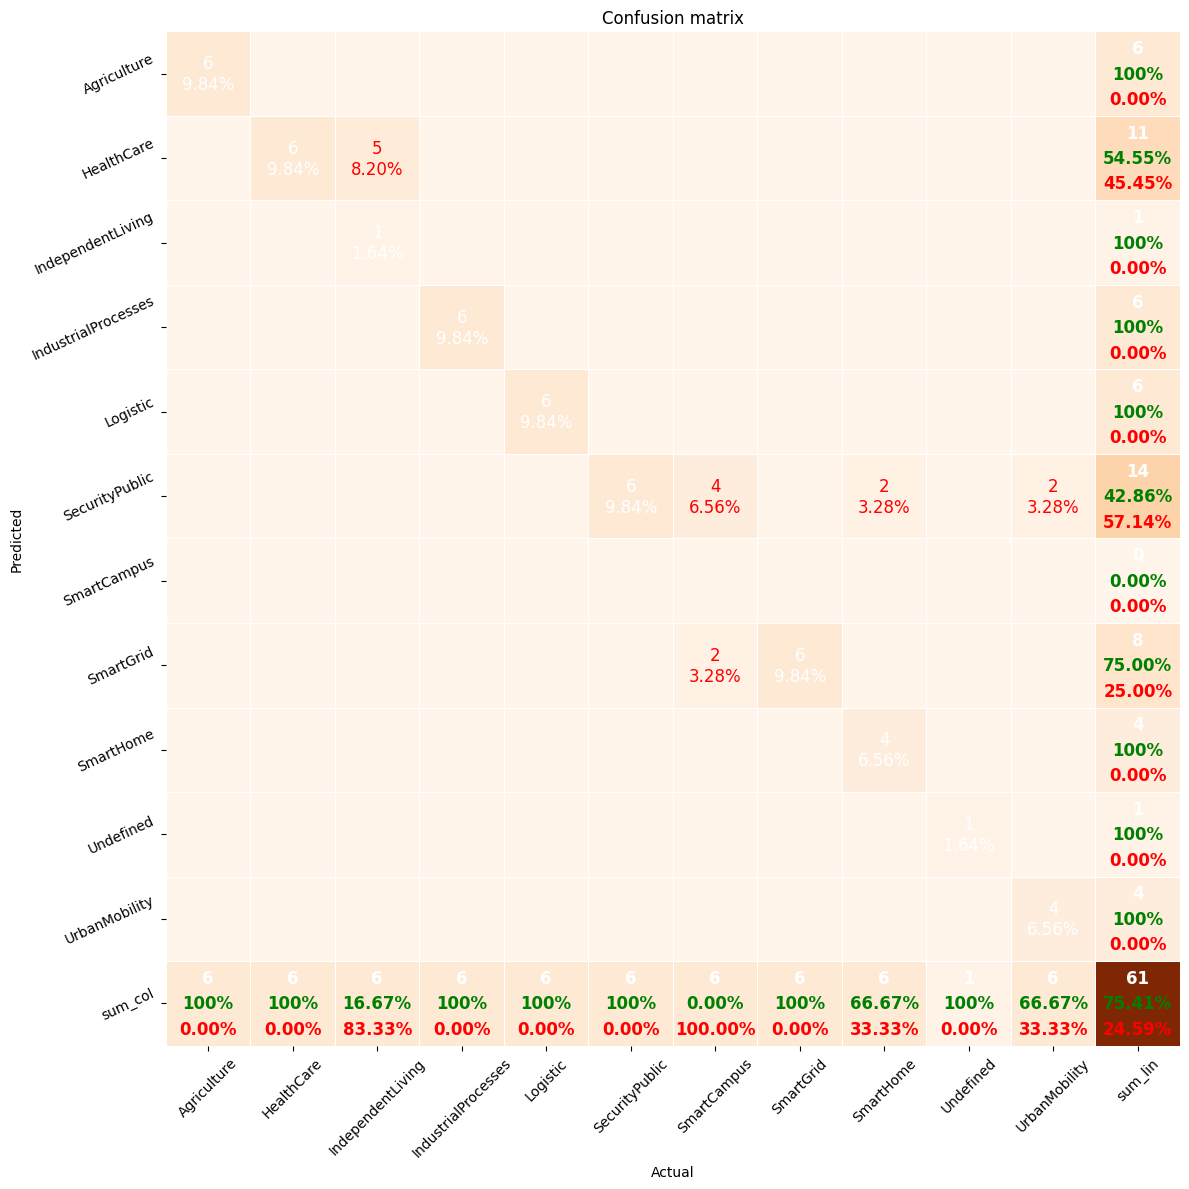

In [6]:
pp_matrix(real_mc, fz=12, figsize=[12, 12])

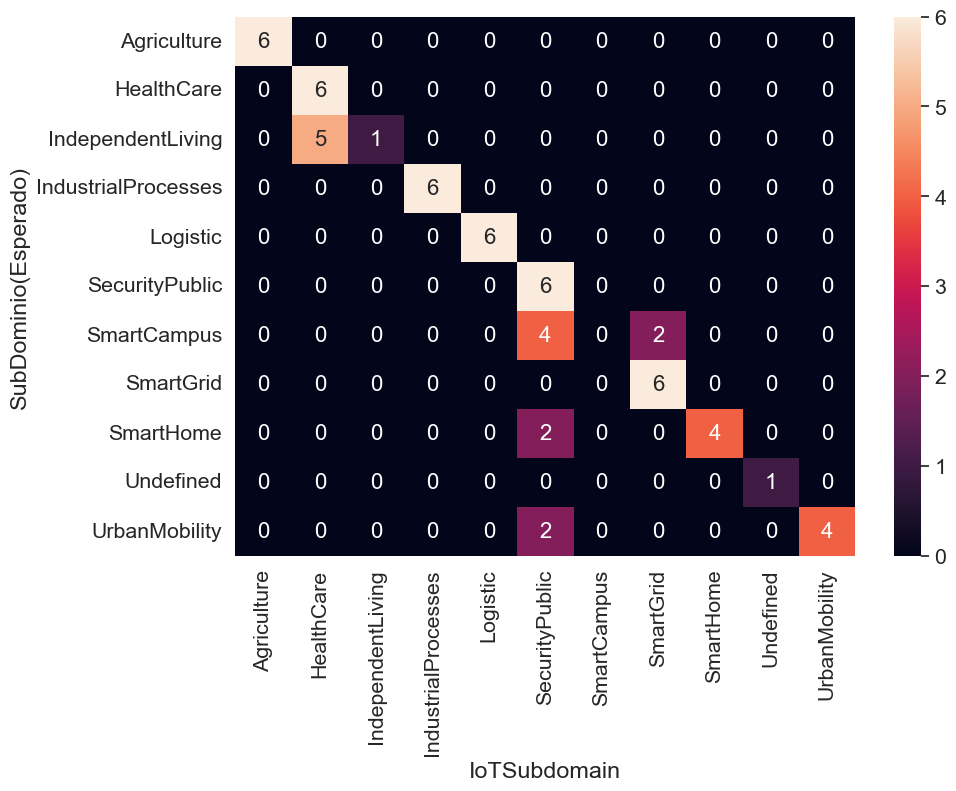

In [7]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(real_mc, annot=True, annot_kws={"size": 16}) # font size

plt.show()